In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fqtoolkit import dgToDf as dtd
import statsmodels.api as sm

In [2]:
from sklearn.tree import DecisionTreeRegressor

In [3]:
assets, liability, sale, income, price = [item[1] for item in dtd("data2.xlsx", "Sheet1", 5).items()]

##  EDA

In [ ]:
# 데이터 분석 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

dataguide를 활용하여 excel 파일을 다운 받았습니다.      
   
- 기업 : 코스피 시총 상위 50개 기업 + 코스닥 시총 상위 50개 기업 
- 기간 : 2020.01 ~ 2022.05  
- 기준 : 월말, 1~12월 data same
- 단위 : KRW(원)


In [18]:
assets.head(20)

,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,NAVER,삼성SDI,현대차,카카오,LG화학,기아,...,네이처셀,주성엔지니어링,SFA반도체,덕산네오룩스,메가스터디교육,NICE평가정보,피엔티,케어젠,와이지엔터테인먼트,에이비엘바이오
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2000-01-31,46421503465,NaN,21282867496,NaN,36402021,5663564956,31987210000,91971349,NaN,8828701125,...,20534862,200839010,22005398,NaN,NaN,55336163,NaN,NaN,NaN,NaN
2000-02-29,46421503465,NaN,21282867496,NaN,36402021,5663564956,31987210000,91971349,NaN,8828701125,...,20534862,200839010,22005398,NaN,NaN,55336163,NaN,NaN,NaN,NaN
2000-03-31,46421503465,NaN,21282867496,NaN,36402021,5663564956,31987210000,91971349,NaN,8828701125,...,20534862,200839010,22005398,NaN,NaN,55336163,NaN,NaN,NaN,NaN
2000-04-30,46421503465,NaN,21282867496,NaN,36402021,5663564956,31987210000,91971349,NaN,8828701125,...,20534862,200839010,22005398,NaN,NaN,55336163,NaN,NaN,NaN,NaN
2000-05-31,46421503465,NaN,21282867496,NaN,36402021,5663564956,31987210000,91971349,NaN,8828701125,...,20534862,200839010,22005398,NaN,NaN,55336163,NaN,NaN,NaN,NaN
2000-06-30,46421503465,NaN,21282867496,NaN,36402021,5663564956,31987210000,91971349,NaN,8828701125,...,20534862,200839010,22005398,NaN,NaN,55336163,NaN,NaN,NaN,NaN
2000-07-31,46421503465,NaN,21282867496,NaN,36402021,5663564956,31987210000,91971349,NaN,8828701125,...,20534862,200839010,22005398,NaN,NaN,55336163,NaN,NaN,NaN,NaN
2000-08-31,46421503465,NaN,21282867496,NaN,36402021,5663564956,31987210000,91971349,NaN,8828701125,...,20534862,200839010,22005398,NaN,NaN,55336163,NaN,NaN,NaN,NaN
2000-09-30,46421503465,NaN,21282867496,NaN,36402021,5663564956,31987210000,91971349,NaN,8828701125,...,20534862,200839010,22005398,NaN,NaN,55336163,NaN,NaN,NaN,NaN


In [20]:
assets.info()

# 각 column(기업)의 non-null의 갯수는 증권시장에 상장유지 중인 달의 숫자입니다. 
# 예를들어 시가총액 2위의 lg에너지솔루션은 2000-01-30에 null 값으로 표시된 이유는 해당일에 비상장 이였기 때문입니다
# Dtype object는 string 형태의 data를 의미합니다

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 269 entries, 2000-01-31 to 2022-05-16
Data columns (total 100 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   삼성전자        264 non-null    object
 1   LG에너지솔루션    24 non-null     object
 2   SK하이닉스      264 non-null    object
 3   삼성바이오로직스    132 non-null    object
 4   NAVER       264 non-null    object
 5   삼성SDI       264 non-null    object
 6   현대차         264 non-null    object
 7   카카오         264 non-null    object
 8   LG화학        252 non-null    object
 9   기아          264 non-null    object
 10  POSCO홀딩스    264 non-null    object
 11  KB금융        168 non-null    object
 12  신한지주        252 non-null    object
 13  삼성물산        264 non-null    object
 14  셀트리온        240 non-null    object
 15  SK이노베이션     180 non-null    object
 16  현대모비스       264 non-null    object
 17  카카오뱅크       72 non-null     object
 18  SK          264 non-null    object
 19  LG전자        240 non-null    ob

In [168]:
assets0 = assets.pct_change()  # return(수익률) 구하기 위해 

liability0 = liability.pct_change()

In [21]:
assets0 = assets0.shift(12+6)  # 미래 재무제표 데이터를 앞당겨서 쓰지 않기 위해
liability0 = liability0.shift(12+6)
sale = sale.shift(12+6)
income = income.shift(12+6)

In [171]:
sale.head(30)

,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,NAVER,삼성SDI,현대차,카카오,LG화학,기아,...,네이처셀,주성엔지니어링,SFA반도체,덕산네오룩스,메가스터디교육,NICE평가정보,피엔티,케어젠,와이지엔터테인먼트,에이비엘바이오
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
returns = price.pct_change() 

In [25]:
price = price.dropna(axis=1)
returns = price.shift(0).pct_change()
returns0 = price.shift(0).pct_change()
returns.head(20)  # 가격(price) 월별 변화율

,삼성전자,SK하이닉스,삼성SDI,현대차,카카오,기아,POSCO홀딩스,현대모비스,한국전력,SK텔레콤,...,기업은행,롯데케미칼,한국조선해양,한온시스템,HLB,CJ ENM,동진쎄미켐,동화기업,네이처셀,주성엔지니어링
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,-0.082353,-0.321969,-0.260679,-0.295339,0.514400,-0.334669,-0.161663,-0.346719,-0.184405,0.111123,...,-0.256729,-0.098794,-0.134601,-0.312377,0.104167,0.382981,0.811111,-0.411042,0.519904,0.274816
2000-03-31,0.308528,0.374299,0.246199,0.112115,-0.442917,0.118542,-0.044846,0.000000,0.113050,-0.142876,...,-0.097493,-0.022608,0.025397,0.000000,1.113207,0.092308,-0.187611,0.634200,0.684271,-0.244460
2000-04-30,-0.104579,-0.284553,0.129266,-0.220115,-0.487833,0.007934,-0.184961,0.019490,0.031743,-0.180542,...,-0.036265,-0.234328,-0.294147,0.105714,-0.075893,-0.428163,-0.188794,-0.111360,-0.078178,-0.087366
2000-05-31,0.026641,0.000000,-0.071280,0.157807,0.535240,0.226033,-0.020750,-0.091544,-0.067676,0.305103,...,0.128102,-0.275832,-0.074534,-0.108527,-0.615459,0.002460,-0.228829,0.330308,-0.357586,-0.283624
2000-06-30,0.199722,0.250001,0.255939,0.181818,0.315195,0.035772,0.118782,0.350061,0.141908,-0.051978,...,0.995032,-0.110676,-0.004705,0.136232,0.268844,-0.103194,-0.088785,-0.178734,0.266484,0.054159
2000-07-31,-0.200463,-0.209091,-0.078515,0.045470,-0.326419,0.124862,-0.069781,0.059053,-0.069384,-0.238361,...,-0.419424,0.002489,-0.047619,0.122449,0.708911,0.173958,-0.328632,-0.040157,-0.406243,-0.457172
2000-08-31,-0.072947,0.166668,0.004074,0.123720,-0.030795,-0.062389,-0.068183,0.090858,0.012450,-0.122304,...,-0.098039,0.021390,0.099927,-0.006818,-0.507532,0.026840,-0.021642,0.041837,0.449156,-0.094646
2000-09-30,-0.261334,-0.214286,-0.109097,-0.136872,-0.158951,-0.096348,0.012195,-0.135963,-0.107397,0.114769,...,0.015625,-0.130703,-0.090849,-0.178490,-0.360000,-0.193180,-0.013663,-0.113316,-0.268767,-0.417404


In [26]:
from sklearn.metrics import classification_report


results = {}
r2 = []

for maxD in range(1,3):

    for col in returns.columns:

        reSeries = {}

        for n in range(1, returns.shape[0]-152):

            #n부터 n+120까지의 롤링 데이터 준비
            temp = pd.DataFrame({"asset":assets0[col].iloc[n:n+151],
                                "liability":liability0[col].iloc[n:n+151],
                                "sale":sale[col].iloc[n:n+151],
                                "income":income[col].iloc[n:n+151],
                                 "re0": returns[col].iloc[n-1:n+150],
                                "re": returns[col].iloc[n:n+151]})

            temp = temp.dropna()


            if temp.shape[0] < 50:

                continue

            model = DecisionTreeRegressor(max_depth=maxD, random_state=10)#

            model.fit(temp.drop("re", axis=1).iloc[:-1,:], temp["re"].iloc[:-1])

            r = model.predict(temp.drop("re", axis=1).iloc[[-1], :])

            reSeries[temp.index[-1]] = temp["re"].iloc[-1]-r[0]

            if len(reSeries) > 0:
                results[col] = pd.Series(reSeries)


    results = pd.DataFrame(results)


    signal = (results).mean(axis=1)
        #
        #signal = (signal-signal.shift(1).rolling(n).mean())/signal.shift(1).rolling(n).std() #변경 말것!
    temp = pd.DataFrame({"returns":returns.shift(-1).mean(axis=1), "result":signal}).dropna()
    test = temp.iloc[int(temp.shape[0]/4):2*int(temp.shape[0]/4), :]
    test0 = temp.iloc[2*int(temp.shape[0]/4):, :]

    mu = temp.result.iloc[:int(temp.shape[0]/4)].mean()
    sd = temp.result.iloc[:int(temp.shape[0]/4)].std()

    test.result = (test.result-mu)/sd

    test0.result = (test0.result-mu)/sd


    test["returns+"] = np.where(test["returns"] > 0, test["returns"], 0)
    test0["returns+"] = np.where(test0["returns"] > 0, test0["returns"], 0)

    test["port"] = test["returns"] * -1*test.result#np.where(-1*test.result >0,, 0)
    test0["port"] = test0["returns"] * np.where( test0.result< 0,1, 0)#np.where( -1*test0.result > 0, 1, 0)


    print(f"{np.corrcoef(test.returns, -test.result)[1,0 ] ** 2 * 100:.4f}%")

    print(classification_report(np.where(test.returns> 0, 1, 0), np.where(-test.result >0, 1, 0)))

    r2.append(np.corrcoef(test.returns, -test.result)[1,0 ] ** 2)




C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\user\AppData\Local\Temp/ipykernel_1792/2552516640.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["returns+"] = np.where(test["returns"] > 0, test["returns"], 0)
C:\Users\user\AppData\Local\Temp/ipykernel_1792/2552516640.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

0.0946%
              precision    recall  f1-score   support

           0       0.22      0.22      0.22         9
           1       0.65      0.65      0.65        20

    accuracy                           0.52        29
   macro avg       0.44      0.44      0.44        29
weighted avg       0.52      0.52      0.52        29

1.8319%
              precision    recall  f1-score   support

           0       0.21      0.33      0.26         9
           1       0.60      0.45      0.51        20

    accuracy                           0.41        29
   macro avg       0.41      0.39      0.39        29
weighted avg       0.48      0.41      0.44        29



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\user\AppData\Local\Temp/ipykernel_1792/2552516640.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["returns+"] = np.where(test["returns"] > 0, test["returns"], 0)
C:\Users\user\AppData\Local\Temp/ipykernel_1792/2552516640.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

describe()  
- count : 개수
- mean : 평균
- std : 표준 편차
- min : 최솟값
- 25% : 제 1사분위값
- 50% : 중앙값, 중위값
- 75% : 제 3사분위값
- max : 최댓값

In [28]:
 temp.describe()


,returns,result
count,116.000000,116.000000
mean,0.014439,-0.038416
std,0.044724,1.159848
min,-0.143670,-5.235786
25%,-0.010496,-0.584017
50%,0.015575,-0.000086
75%,0.045685,0.412632
max,0.132468,3.953457


In [29]:
test.describe()

,returns,result,returns+,port
count,29.000000,29.000000,29.000000,29.000000
mean,0.017804,-0.157581,0.024760,-0.001546
std,0.034338,0.969770,0.025459,0.034481
min,-0.044256,-2.027640,0.000000,-0.062189
25%,-0.004941,-0.865989,0.000000,-0.022339
50%,0.016780,-0.029660,0.016780,-0.000625
75%,0.046508,0.321827,0.046508,0.008213
max,0.086510,1.558118,0.086510,0.076254


In [32]:
for col in temp.columns:
    if temp[col].dtype == 'object':
        categories = temp[col].unique()
        print(f'[{col}] ({len(categories)})')
        print('\n'.join(categories))
        print()

In [33]:
for col in temp.columns:
    if temp[col].dtype == 'object':
        categories = temp[col].unique()
        print(f'[{col}] ({len(categories)})')

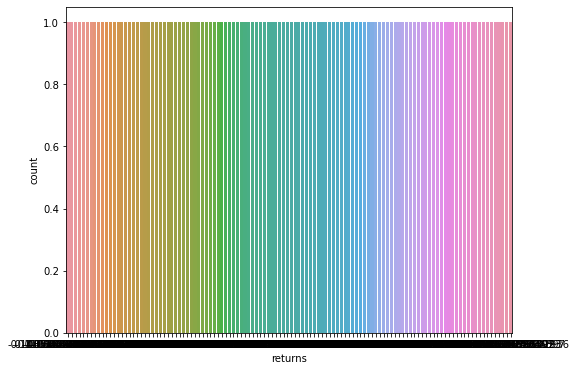

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x='returns', data=temp)
plt.show()

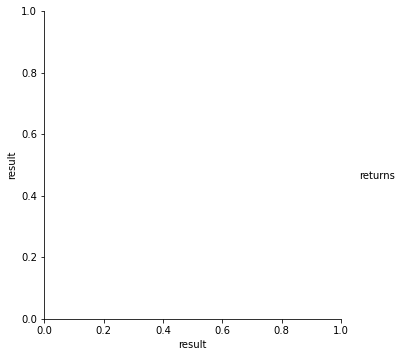

In [36]:
sns.pairplot(temp, hue = 'returns', height = 5)
plt.show()

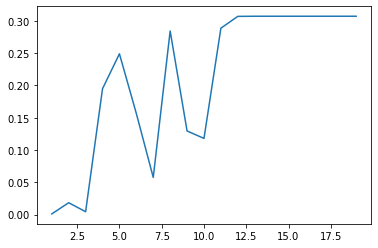

In [298]:
plt.plot(range(1, 20), r2)

In [314]:
maxD = 20


for col in returns.columns:

    reSeries = {}

    for n in range(1, returns.shape[0]-152):

            #n부터 n+120까지의 롤링 데이터 준비
        temp = pd.DataFrame({"asset":assets0[col].iloc[n:n+151],
                                "liability":liability0[col].iloc[n:n+151],
                                "sale":sale[col].iloc[n:n+151],
                                "income":income[col].iloc[n:n+151],
                                 "re0": returns[col].iloc[n-1:n+150],
                                "re": returns[col].iloc[n:n+151]})

        temp = temp.dropna()


        if temp.shape[0] < 50:

            continue

        model = DecisionTreeRegressor(max_depth=maxD, random_state=10)#

        model.fit(temp.drop("re", axis=1).iloc[:-1,:], temp["re"].iloc[:-1])

        r = model.predict(temp.drop("re", axis=1).iloc[[-1], :])

        reSeries[temp.index[-1]] = temp["re"].iloc[-1]-r[0]

        if len(reSeries) > 0:
            results[col] = pd.Series(reSeries)





In [356]:
results = pd.DataFrame(results)


signal = (results).mean(axis=1)
        #
        #signal = (signal-signal.shift(1).rolling(n).mean())/signal.shift(1).rolling(n).std() #변경 말것!
temp = pd.DataFrame({"returns":returns.shift(-1).mean(axis=1), "result":signal}).dropna()
test = temp.iloc[int(temp.shape[0]/4):2*int(temp.shape[0]/4), :]
test0 = temp.iloc[2*int(temp.shape[0]/4):, :]

mu = temp.result.iloc[:int(temp.shape[0]/4)].mean()
sd = temp.result.iloc[:int(temp.shape[0]/4)].std()

test.result = (test.result-mu)/sd

test0.result = (test0.result-mu)/sd


test["returns+"] = np.where(test["returns"] > 0, test["returns"], 0)
test0["returns+"] = np.where(test0["returns"] > 0, test0["returns"], 0)

test["port"] = test["returns"]* np.where( test.result< 0, -test.result, 0)
test0["port"] = test0["returns"] * np.where( test0.result< 0, -test0.result, 0)#np.where( -1*test0.result > 0, 1, 0)


print(f"{np.corrcoef(test.returns, -test.result)[1,0 ] ** 2 * 100:.4f}%")

print(classification_report(np.where(test.returns> 0, 1, 0), np.where(-test.result >0, 1, 0)))

r2.append(np.corrcoef(test.returns, -test.result)[1,0 ] ** 2)


30.7340%
              precision    recall  f1-score   support

           0       0.50      0.22      0.31         9
           1       0.72      0.90      0.80        20

    accuracy                           0.69        29
   macro avg       0.61      0.56      0.55        29
weighted avg       0.65      0.69      0.65        29



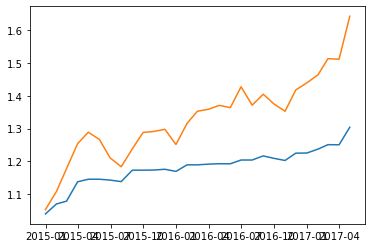

In [357]:
plt.plot((1+test["port"]).cumprod())
plt.plot((1+test.returns).cumprod())

In [358]:
sm.OLS(test["port"], sm.add_constant(test[["returns", "returns+"]])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   port   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     28.53
Date:                Sun, 22 May 2022   Prob (F-statistic):           2.77e-07
Time:                        17:22:30   Log-Likelihood:                 96.494
No. Observations:                  29   AIC:                            -187.0
Df Residuals:                      26   BIC:                            -182.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0038      0.003     -1.169      0.253      -0.010       0.003
returns       -0.0244      0.155     -0.158      0.876      -0.343       0.294
returns+       0.5452      0.209      2.609      0.015       0.116       0.975
==============================================================================
Omnibus:                        4.414   Durbin-Watson:                   2.723
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.637
Skew:                           0.207   Prob(JB):                        0.162
Kurtosis:                       4.685   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [359]:
from sklearn.metrics import accuracy_score

In [360]:
import warnings
warnings.filterwarnings('ignore')

In [361]:
print(f"{np.corrcoef(test0.returns, -test0.result)[1,0 ] ** 2 * 100:.4f}%")
    
print(classification_report(np.where(test0.returns> 0, 1, 0), np.where(-test0.result >0, 1, 0)))

0.9913%
              precision    recall  f1-score   support

           0       0.33      0.24      0.28        21
           1       0.63      0.73      0.68        37

    accuracy                           0.55        58
   macro avg       0.48      0.48      0.48        58
weighted avg       0.52      0.55      0.53        58



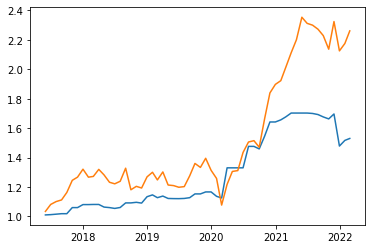

In [362]:
plt.plot((1+test0["port"]).cumprod())
plt.plot((1+test0.returns).cumprod())

In [363]:
test0.where(test0.result < 0, np.nan).corr() ** 2

,returns,result,returns+,port
returns,1.000000,0.019185,0.776018,0.516127
result,0.019185,1.000000,0.040811,0.116711
returns+,0.776018,0.040811,1.000000,0.514781
port,0.516127,0.116711,0.514781,1.000000


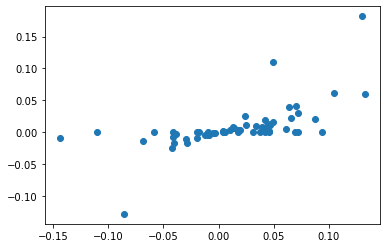

In [364]:
plt.plot(test0.returns ,test0["port"], "o")

In [365]:
print(test0["port"].mean() * np.sqrt(12)/ test0["port"].std())
print(test0["returns"].mean() * np.sqrt(12)/ test0["returns"].std())

0.764866057832263
0.9993729076631666


In [366]:
test0.corr()

,returns,result,returns+,port
returns,1.000000,-0.099565,0.875967,0.622261
result,-0.099565,1.000000,-0.147109,-0.187228
returns+,0.875967,-0.147109,1.000000,0.640687
port,0.622261,-0.187228,0.640687,1.000000


In [367]:
sm.OLS(test0["port"], sm.add_constant(test0[["returns", "returns+"]])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   port   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     20.45
Date:                Sun, 22 May 2022   Prob (F-statistic):           2.29e-07
Time:                        17:22:39   Log-Likelihood:                 126.98
No. Observations:                  58   AIC:                            -248.0
Df Residuals:                      55   BIC:                            -241.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0075      0.006     -1.253      0.215      -0.020       0.005
returns        0.1752      0.141      1.239      0.221      -0.108       0.458
returns+       0.4263      0.220      1.941      0.057      -0.014       0.867
==============================================================================
Omnibus:                       23.136   Durbin-Watson:                   2.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.243
Skew:                           0.549   Prob(JB):                     1.60e-35
Kurtosis:                      11.069   Cond. No.                         69.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

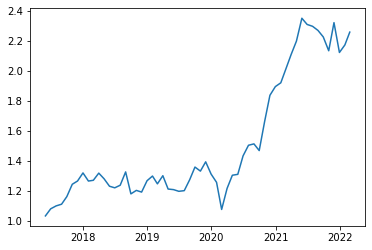

In [327]:
plt.plot((1+test0["returns"]).cumprod())

In [95]:
np.mean(np.where(test0["returns"]>0, 1, 0))

0.6379310344827587

In [368]:
from itertools import combinations as c

def estimation(bench, port):
    
    n0 = 0
    
    n = 0
    
    for t1, t2, t3 in c(range(len(bench)), 3):
        
        n0 += 1
        
        rms = bench.iloc[[t1, t2, t3]].sort_values()
        
        trueT1, trueT2, trueT3 = rms.index
        
        betaH = (port.loc[trueT3] - port.loc[trueT2]) / (bench.loc[trueT3] - bench.loc[trueT2])
        
        betaL = (port.loc[trueT2] - port.loc[trueT1]) / (bench.loc[trueT2] - bench.loc[trueT1])
        
        if betaH > betaL:
            
            n += 1
            
            
    return 2*(n / n0) -1
        
    
def kernel(rms, ris):
    
    rm1, rm2, rm3 = rms
    ri1, ri2, ri3 = ris
    
    premise = rm1 < rm2 and rm2 < rm3
    
    if not premise:
        
        return 0
    
    betaH = (ri3 - ri2) / (rm3 - rm2)
        
    betaL = (ri2 - ri1) / (rm2 - rm1)
    
    conclusion = betaH > betaL
    
    
    if  premise and not conclusion:
        
        return 0
    
    else:
        
        return 1
    
    
    
def stanardE(bench, port, esti):
    
    sum0 = 0
    
    for t1 in bench.index:
        
        sum1 = 0
        
        n0 = 0
        
        for t2, t3 in c(bench.index, 2):
            
            n0 += 1
            
            sum1 += kernel(bench.loc[[t1, t2, t3]], port.loc[[t1, t2, t3]])
            
            
        sum1 = (sum1 / n0 - esti) ** 2
        
        sum0 += sum1
        
        
    
    var = 9 / len(bench.index) * sum0
    
    return np.sqrt(var)
    
from scipy.stats import norm

def nonParaMT(bench, port):
    
    esti = estimation(bench, port)
    se = stanardE(bench, port, esti)
    
    statistic = esti * np.sqrt(len(bench)) /se
    
    pVal = 1 - norm.cdf(statistic, loc=0, scale=1)
    
    return esti, se , statistic, pVal

In [369]:
nonParaMT(test0["returns"], test0["port"])

(0.08912367124708331,
 0.27875110571560674,
 2.4349523451644264,
 0.007446875530752406)